# Car Prices Predictions
- we are trying to predict the price of a car beaced on several features

### Loading the dataset

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [85]:
raw = pd.read_csv('C:/Users/tomas/OneDrive/Plocha/CarPricePredictions/data.csv')
raw.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Preprocessing

In [18]:
raw.shape

(11914, 16)

#### replacing white spaces

In [13]:
raw.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [86]:
raw.columns = raw.columns.str.replace(' ', '_')

In [15]:
raw.columns

Index(['Make', 'Model', 'Year', 'Engine_Fuel_Type', 'Engine_HP',
       'Engine_Cylinders', 'Transmission_Type', 'Driven_Wheels',
       'Number_of_Doors', 'Market_Category', 'Vehicle_Size', 'Vehicle_Style',
       'highway_MPG', 'city_mpg', 'Popularity', 'MSRP'],
      dtype='object')

#### Solving null values

In [17]:
raw.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine_Fuel_Type        3
Engine_HP              69
Engine_Cylinders       30
Transmission_Type       0
Driven_Wheels           0
Number_of_Doors         6
Market_Category      3742
Vehicle_Size            0
Vehicle_Style           0
highway_MPG             0
city_mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [20]:
raw['Market_Category'].unique()

array(['Factory Tuner,Luxury,High-Performance', 'Luxury,Performance',
       'Luxury,High-Performance', 'Luxury', 'Performance', 'Flex Fuel',
       'Flex Fuel,Performance', nan, 'Hatchback',
       'Hatchback,Luxury,Performance', 'Hatchback,Luxury',
       'Luxury,High-Performance,Hybrid', 'Diesel,Luxury',
       'Hatchback,Performance', 'Hatchback,Factory Tuner,Performance',
       'High-Performance', 'Factory Tuner,High-Performance',
       'Exotic,High-Performance', 'Exotic,Factory Tuner,High-Performance',
       'Factory Tuner,Performance', 'Crossover', 'Exotic,Luxury',
       'Exotic,Luxury,High-Performance', 'Exotic,Luxury,Performance',
       'Factory Tuner,Luxury,Performance', 'Flex Fuel,Luxury',
       'Crossover,Luxury', 'Hatchback,Factory Tuner,Luxury,Performance',
       'Crossover,Hatchback', 'Hybrid', 'Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance,Hybrid',
       'Crossover,Luxury,Performance',
       'Exotic,Factory Tuner,Luxury,High-Performance',
   

- 'Market_Category' has too many missing values, we cannot delete them all as it would effect the overal model
    - it also includes 71 groups, most of them repeats themselves
    - the best solution is to eliminate this feature and do not inlcude in the MLR

In [87]:
raw = raw.drop(['Market_Category'], axis=1)

In [22]:
raw.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine_Fuel_Type      3
Engine_HP            69
Engine_Cylinders     30
Transmission_Type     0
Driven_Wheels         0
Number_of_Doors       6
Vehicle_Size          0
Vehicle_Style         0
highway_MPG           0
city_mpg              0
Popularity            0
MSRP                  0
dtype: int64

- now we can drop the null values, since there is only few of them

In [88]:
raw = raw.dropna(axis=0)

In [27]:
raw.describe(include='all')

,Make,Model,Year,Engine_Fuel_Type,Engine_HP,Engine_Cylinders,Transmission_Type,Driven_Wheels,Number_of_Doors,Vehicle_Size,Vehicle_Style,highway_MPG,city_mpg,Popularity,MSRP
count,11812,11812,11812.000000,11812,11812.000000,11812.000000,11812,11812,11812.000000,11812,11812,11812.000000,11812.000000,11812.000000,1.181200e+04
unique,47,904,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,156,NaN,7155,NaN,NaN,8231,4732,NaN,4708,3013,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.361581,NaN,249.504487,5.649424,NaN,NaN,3.432526,NaN,NaN,26.320945,19.328141,1553.679902,4.055994e+04
std,NaN,NaN,7.594647,NaN,109.206947,1.751646,NaN,NaN,0.882919,NaN,NaN,7.443589,6.527734,1440.067820,6.028413e+04
min,NaN,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099000e+04
50%,NaN,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.997000e+04
75%,NaN,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.220500e+04


In [89]:
df = raw.copy()

### Numerical features

#### Multicollinearity

In [33]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Year,Engine_HP,Engine_Cylinders,Number_of_Doors,highway_MPG,city_mpg,Popularity,MSRP
Year,1.000000,0.352861,-0.034455,0.262439,0.280198,0.232388,0.073563,0.227327
Engine_HP,0.352861,1.000000,0.779862,-0.101944,-0.414263,-0.466033,0.036522,0.661827
Engine_Cylinders,-0.034455,0.779862,1.000000,-0.137624,-0.620313,-0.637875,0.045042,0.544002
Number_of_Doors,0.262439,-0.101944,-0.137624,1.000000,0.120960,0.136642,-0.049863,-0.127316
highway_MPG,0.280198,-0.414263,-0.620313,0.120960,1.000000,0.847023,-0.029239,-0.198962
city_mpg,0.232388,-0.466033,-0.637875,0.136642,0.847023,1.000000,-0.010787,-0.225317
Popularity,0.073563,0.036522,0.045042,-0.049863,-0.029239,-0.010787,1.000000,-0.048609
MSRP,0.227327,0.661827,0.544002,-0.127316,-0.198962,-0.225317,-0.048609,1.000000


- there are few feature that seem to be correlated, let's see Variance Inflation Factor

In [42]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# df[['Year', 'Engine_HP', 'Engine_Cylinders', 'Number_of_Doors', 'highway_MPG', 'city_mpg', 'Popularity']]

variables = df[['Year', 'Engine_HP', 'Engine_Cylinders', 'Number_of_Doors', 'highway_MPG', 'city_mpg', 'Popularity']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,84.944501,Year
1,16.177851,Engine_HP
2,40.444375,Engine_Cylinders
3,16.652915,Number_of_Doors
4,50.877951,highway_MPG
5,37.585663,city_mpg
6,2.177573,Popularity


- VIF indicates many problematic features
- I eliminated those with VIF above 10 in order from the least correlation value with Price
- I calculated new VIF everytime I removed a feature
- following is the best combination

In [43]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# df[['Year', 'Engine_HP', 'Engine_Cylinders', 'Number_of_Doors', 'highway_MPG', 'city_mpg', 'Popularity']]

variables = df[['Engine_HP', 'Number_of_Doors', 'city_mpg', 'Popularity']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns

vif

,VIF,Features
0,4.521470,Engine_HP
1,10.957147,Number_of_Doors
2,7.457938,city_mpg
3,2.104565,Popularity


In [90]:
df = df.drop(['Year', 'Engine_Cylinders', 'highway_MPG'], axis=1)

### Exploring PDFs

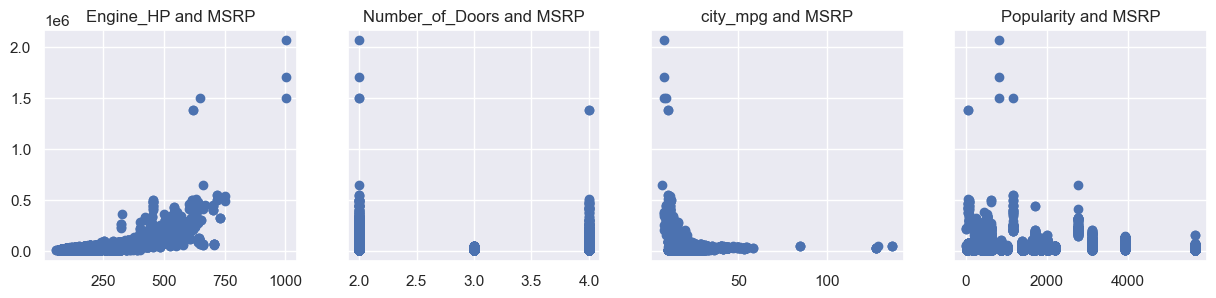

In [49]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(df['Engine_HP'], df['MSRP'])
ax1.set_title('Engine_HP and MSRP')
ax2.scatter(df['Number_of_Doors'], df['MSRP'])
ax2.set_title('Number_of_Doors and MSRP')
ax3.scatter(df['city_mpg'], df['MSRP'])
ax3.set_title('city_mpg and MSRP')
ax4.scatter(df['Popularity'], df['MSRP'])
ax4.set_title('Popularity and MSRP')


plt.show()

- none of the features is linear and Number_of_doors with Popularity seems more like categorical features
- we can also see problems with outliners

#### PDF of the target 'MSRP'

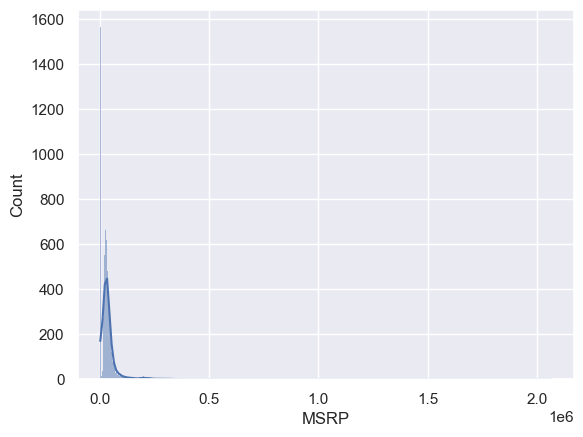

In [57]:
sns.histplot(df['MSRP'], kde=True);

In [54]:
# skewness

df['MSRP'].skew()

11.765020294059902

#### logarithm the target 'MSRP' to fix skewness and linearity with features

In [91]:
df['log_MSRP'] = np.log(df['MSRP'])

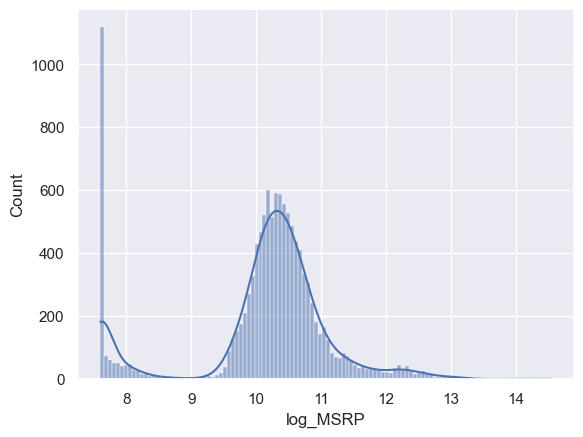

In [59]:
sns.histplot(df['log_MSRP'], kde=True);

In [68]:
# skewness

df['log_MSRP'].skew()

-0.9120799645427694

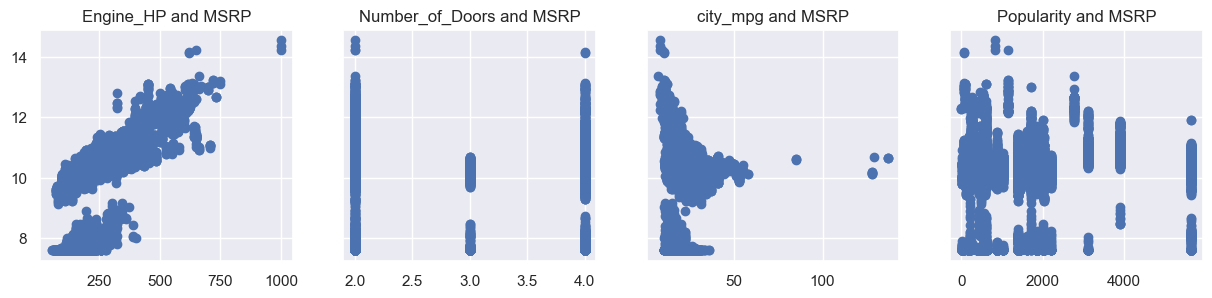

In [63]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(df['Engine_HP'], df['log_MSRP'])
ax1.set_title('Engine_HP and MSRP')
ax2.scatter(df['Number_of_Doors'], df['log_MSRP'])
ax2.set_title('Number_of_Doors and MSRP')
ax3.scatter(df['city_mpg'], df['log_MSRP'])
ax3.set_title('city_mpg and MSRP')
ax4.scatter(df['Popularity'], df['log_MSRP'])
ax4.set_title('Popularity and MSRP')


plt.show()

- Number_of_doors and Popularity should be treated as categorical

#### Converting 'Popularity' and 'number_of_doors' to categorical features

In [92]:
bins = [0, 2.5, 3.5, 4]
labels = [2,3,4]
df['binned_Number_of_Doors'] = pd.cut(df['Number_of_Doors'], bins=bins, labels=labels)

In [93]:
df['binned_Number_of_Doors'].value_counts()

4    8263
2    3154
3     395
Name: binned_Number_of_Doors, dtype: int64

In [94]:
df['Popularity'].unique()

array([3916, 3105,  819,  617, 1013, 2009,  870,  586,  436, 2774,  113,
       2031,  416,   67,  210, 1715,  376,  549, 1439,  535, 2202,   26,
        481, 5657, 1624, 1720,  520, 1385, 1851, 1158,   61,  640,  873,
          2,  155,  204,   86,  238,  454,  259,  258,  613,  190,  105,
         21,  130,  820], dtype=int64)

In [95]:
bins = [1, 549, 1385, 2009, 5657]
labels = [549, 1385, 2009, 5657]
df['binned_Popularity'] = pd.cut(df['Popularity'], bins=bins, labels=labels)

In [96]:
df['binned_Popularity'].value_counts()

1385    3542
549     3246
5657    2788
2009    2236
Name: binned_Popularity, dtype: int64

In [97]:
df = df.drop(['Popularity', 'Number_of_Doors'], axis=1)

In [83]:
df.head()

,Make,Model,Engine_Fuel_Type,Engine_HP,Transmission_Type,Driven_Wheels,Vehicle_Size,Vehicle_Style,city_mpg,MSRP,log_MSRP,binned_Number_of_Doors,binned_Popularity
0,BMW,1 Series M,premium unleaded (required),335.0,MANUAL,rear wheel drive,Compact,Coupe,19,46135,10.739327,2,"(2009.0, 5657.0]"
1,BMW,1 Series,premium unleaded (required),300.0,MANUAL,rear wheel drive,Compact,Convertible,19,40650,10.612754,2,"(2009.0, 5657.0]"
2,BMW,1 Series,premium unleaded (required),300.0,MANUAL,rear wheel drive,Compact,Coupe,20,36350,10.500949,2,"(2009.0, 5657.0]"
3,BMW,1 Series,premium unleaded (required),230.0,MANUAL,rear wheel drive,Compact,Coupe,18,29450,10.290449,2,"(2009.0, 5657.0]"
4,BMW,1 Series,premium unleaded (required),230.0,MANUAL,rear wheel drive,Compact,Convertible,18,34500,10.448715,2,"(2009.0, 5657.0]"


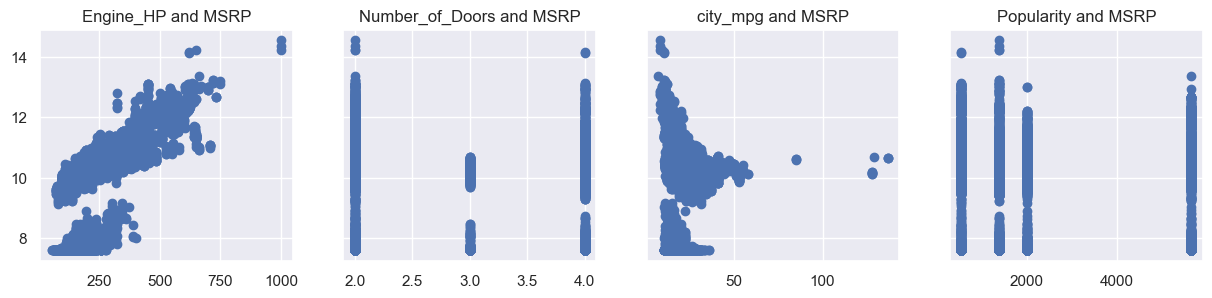

In [98]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3))
ax1.scatter(df['Engine_HP'], df['log_MSRP'])
ax1.set_title('Engine_HP and MSRP')
ax2.scatter(df['binned_Number_of_Doors'], df['log_MSRP'])
ax2.set_title('Number_of_Doors and MSRP')
ax3.scatter(df['city_mpg'], df['log_MSRP'])
ax3.set_title('city_mpg and MSRP')
ax4.scatter(df['binned_Popularity'], df['log_MSRP'])
ax4.set_title('Popularity and MSRP')


plt.show()